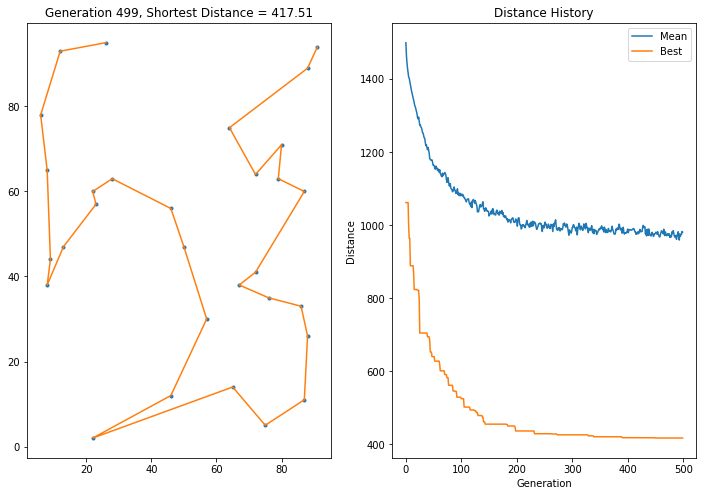

In [136]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output

# n_cities = 30
# city_coords = np.floor(np.random.rand(n_cities,2)*100)

plt.plot(city_coords[:,0],city_coords[:,1],'.')
plt.show()

from scipy.spatial.distance import pdist, squareform
distances = squareform(pdist(city_coords))

def fitness(path):
    return sum(distances[path[:-1],path[1:]])

def cross_over(g1,g2):
#     if np.random.random()<0.5:
    return [x for x in g2 if x not in g1[:n_cities//2]] + list(g1[:n_cities//2])
#     else:
#         return [x for x in g1 if x not in g2[:n_cities//2]] + list(g2[:n_cities//2])

def mutation(g1):
#     print(len(g1))
    if np.random.random() < 0.5:
        p = np.random.randint(n_cities-1,size=1)
        g1 = g1[p[0]:] + g1[:p[0]]
    elif np.random.random() < 0.5:
        p = np.random.randint(n_cities-1,size=1)
        g1[p[0]],g1[p[0]+1] = g1[p[0]+1],g1[p[0]]
    elif np.random.random() < 0.5:
        k = np.random.randint(3)+2
        p = np.random.randint(n_cities-k)
        g1[p:p+k] = g1[p:p+k][::-1]
    else:
        p = np.random.randint(n_cities,size=2)
        g1[p[0]],g1[p[1]] = g1[p[1]],g1[p[0]]
    return g1

def plot_route(g1,f_history,i,f):
    clear_output(wait=True)
    plt.figure(figsize=(12,8))
    plt.subplot(1,2,1)
    plt.plot(city_coords[:,0],city_coords[:,1],'.')
    plt.plot(city_coords[g1,0],city_coords[g1,1])
    plt.title('Generation {}, Shortest Distance = {:.2f}'.format(i,f))
    plt.subplot(1,2,2)
    plt.plot(f_history)
    plt.title('Distance History')
    plt.xlabel('Generation')
    plt.ylabel('Distance')
    plt.legend(['Mean','Best'])
#     plt.axis([0,f_history.shape[1],200,1200])
    plt.show()


n_population = 2000
n_generations = 500
n_elite = 200
n_new = 500
p_mutation = 0.8
g_population = [np.random.permutation(list(range(n_cities))) for i in range(n_population)]

f_history = np.zeros((n_generations,2))*np.nan

for g in range(n_generations):
    fit_values = [fitness(x) for x in g_population]
    f_history[g,0] = np.mean(fit_values)
    f_history[g,1] = min(fit_values)

    rank = np.argsort(fit_values)
    plot_route(g_population[rank[0]],f_history,g,min(fit_values))
    
    probs = max(fit_values)*1 - fit_values
    probs = probs/sum(probs)

    g_new_population = []
    for i in range(n_population-n_elite-n_new):
        parents = np.random.choice(n_population, 2, replace=False, p=probs)
        g_new_population += [cross_over(g_population[parents[0]],g_population[parents[1]])]

    for i in np.where(np.random.random(n_population-n_elite-n_new) < p_mutation)[0]:
        g_new_population[i] = mutation(g_new_population[i])
    
    g_new_population += [list(g_population[i]) for i in rank[:n_elite]]
    g_new_population += [np.random.permutation(list(range(n_cities))) for i in range(n_new)]
    g_population = g_new_population



TypeError: unsupported format string passed to list.__format__

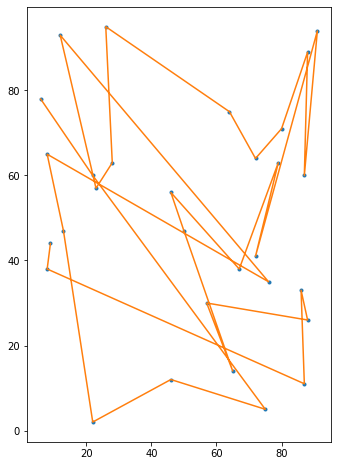

In [134]:
n_run = 100000
dist_hist = np.zeros(n_run)
min_route = []
min_val = 1e7
for i in range(n_run):
    path_1 = np.random.permutation(list(range(n_cities)))
    dist_hist[i] = fitness(path_1)
    if dist_hist[i] < min_val:
        min_val = dist_hist[i]
        min_route = path_1.copy()
    


plt.hist(dist_hist,bins=30)
plt.show()
print(min(dist_hist))
plot_route(min_route,[],[],[])